In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score

In [ ]:
df = pd.read_csv('all_stocks_5yr.csv')
print(df.head(100))

          date   open   high    low  close    volume Name
0   2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1   2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2   2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3   2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4   2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
..         ...    ...    ...    ...    ...       ...  ...
95  2013-06-26  16.50  16.64  16.17  16.17   3604500  AAL
96  2013-06-27  16.29  16.34  16.00  16.31   3566000  AAL
97  2013-06-28  16.24  16.55  16.16  16.42   7063900  AAL
98  2013-07-01  16.50  17.04  16.48  16.80   4666900  AAL
99  2013-07-02  16.78  16.79  16.36  16.43   4009300  AAL

[100 rows x 7 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
df.shape

(619040, 7)

In [ ]:
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [ ]:
# Fill missing numeric values with forward fill
df['open'].fillna(method='ffill', inplace=True)
df['high'].fillna(method='ffill', inplace=True)
df['low'].fillna(method='ffill', inplace=True)

<ipython-input-3-163453290670>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['open'].fillna(method='ffill', inplace=True)
<ipython-input-3-163453290670>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['open'].fillna(method='ffill', inplace=True)
<ipython-input-3-163453290670>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will chang

In [ ]:
# Verify no missing values remain
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [ ]:
# Handle missing values
#df.dropna(inplace=True)

In [ ]:
# Convert Date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Sort data by Date
df = df.sort_values(by='date')

In [ ]:
# list all Name
df['Name'].unique()

array(['AAL', 'SLG', 'SLB', 'BLK', 'SJM', 'BLL', 'SIG', 'BMY', 'SHW',
       'SEE', 'BRK.B', 'SCHW', 'BSX', 'SCG', 'BWA', 'SBUX', 'BXP', 'SBAC',
       'RTN', 'CAG', 'RSG', 'CAH', 'RRC', 'CAT', 'ROST', 'ROP', 'BK',
       'SNA', 'BIIB', 'SNI', 'AXP', 'SYMC', 'AYI', 'SYK', 'AZO', 'SWK',
       'A', 'SWKS', 'BAC', 'STZ', 'STX', 'BAX', 'CA', 'STT', 'STI', 'BBT',
       'SRE', 'SRCL', 'BBY', 'SPG', 'BDX', 'SPGI', 'BEN', 'SO', 'BF.B',
       'SNPS', 'BA', 'ROK', 'CBG', 'RMD', 'PRGO', 'CINF', 'PPL', 'CI',
       'PPG', 'CLX', 'PNW', 'PNR', 'CL', 'PNC', 'CMA', 'PM', 'CHTR',
       'CMCSA', 'CME', 'PKI', 'PKG', 'CMG', 'PH', 'CMI', 'PHM', 'CMS',
       'PG', 'PGR', 'CNC', 'PFG', 'PLD', 'SYY', 'PRU', 'CHRW', 'CBOE',
       'RL', 'CBS', 'RJF', 'RHT', 'CB', 'RHI', 'CCI', 'RF', 'CCL', 'RE',
       'CDNS', 'PSA', 'REG', 'CELG', 'RCL', 'CERN', 'QCOM', 'PX', 'CF',
       'PXD', 'PWR', 'CHD', 'PVH', 'CHK', 'PSX', 'REGN', 'CNP', 'TAP',
       'TDG', 'WMB', 'AES', 'WHR', 'AET', 'WFC', 'AFL', 'WEC', 'WDC'

In [ ]:
# count all Name
df['Name'].value_counts()

Name
AAL     1259
HON     1259
HCA     1259
HCP     1259
HBI     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

In [ ]:
# count total Name
df['Name'].nunique()

505

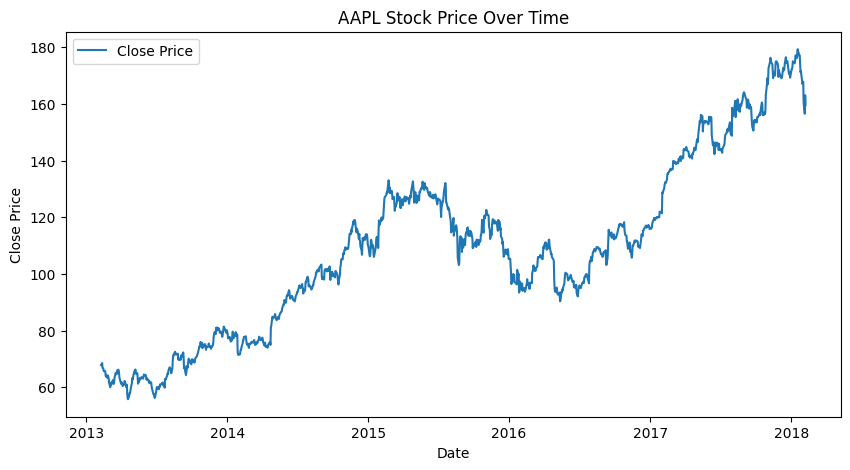

In [ ]:
# Exploratory Data Analysis (EDA)
# Plot closing prices of a specific stock, e.g., 'AAPL'
apple_data = df[df['Name'] == 'AAPL']
plt.figure(figsize=(10, 5))
plt.plot(apple_data['date'], apple_data['close'], label='Close Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# Feature Engineering
# Create new features: Moving Averages
apple_data['MA10'] = apple_data['close'].rolling(window=10).mean()
apple_data['MA50'] = apple_data['close'].rolling(window=50).mean()
apple_data['MA200'] = apple_data['close'].rolling(window=200).mean()

<ipython-input-7-7ad9284da546>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['MA10'] = apple_data['close'].rolling(window=10).mean()
<ipython-input-7-7ad9284da546>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['MA50'] = apple_data['close'].rolling(window=50).mean()
<ipython-input-7-7ad9284da546>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

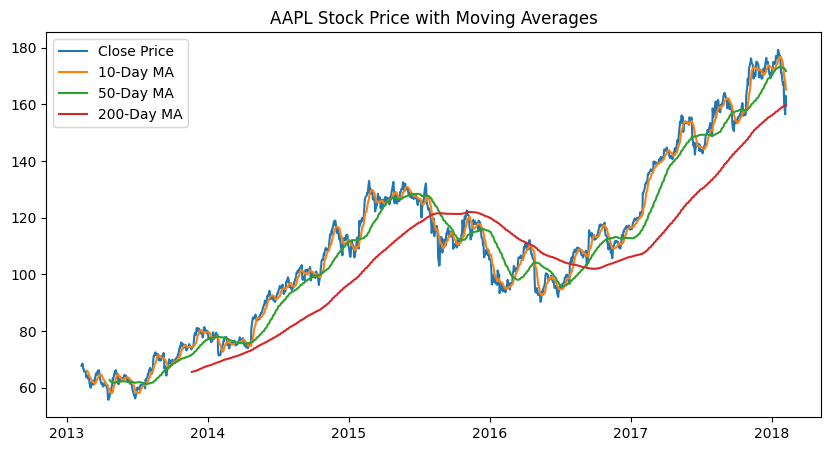

In [ ]:
# Plot Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(apple_data['date'], apple_data['close'], label='Close Price')
plt.plot(apple_data['date'], apple_data['MA10'], label='10-Day MA')
plt.plot(apple_data['date'], apple_data['MA50'], label='50-Day MA')
plt.plot(apple_data['date'], apple_data['MA200'], label='200-Day MA')
plt.title('AAPL Stock Price with Moving Averages')
plt.legend()
plt.show()


In [ ]:
# Model Building: Predicting Close Price
# Prepare data for modeling
features = apple_data[['open', 'high', 'low', 'volume']]
target = apple_data['close']

In [ ]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [ ]:
# Compute entropy for each feature
from scipy.stats import entropy
print("Entropy for each feature:")
for col in features.columns:
    ent = entropy(pd.value_counts(features[col].values, normalize=True), base=2)
    print(f"{col}: {ent:.4f}")

Entropy for each feature:
open: 10.1825
high: 10.1940
low: 10.1904
volume: 10.2981


<ipython-input-15-9c0dba3116cb>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ent = entropy(pd.value_counts(features[col].values, normalize=True), base=2)


In [ ]:
# Compute mutual information scores
mutual_info = mutual_info_regression(X_scaled, target)
mi_scores = pd.Series(mutual_info, index=features.columns)
print("\nMutual Information Scores:")
print(mi_scores.sort_values(ascending=False))


Mutual Information Scores:
low       3.661837
high      3.624320
open      3.047436
volume    0.456255
dtype: float64


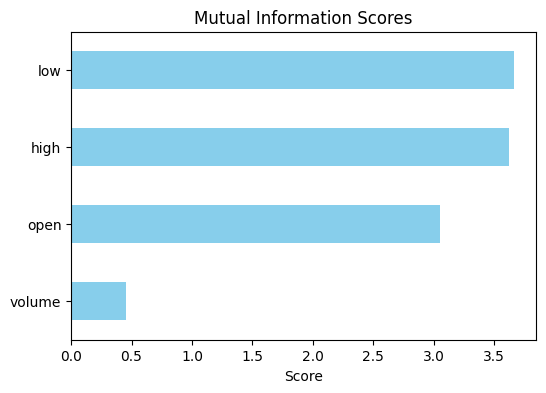

In [ ]:
# Plot mutual information scores
plt.figure(figsize=(6, 4))
mi_scores.sort_values().plot.barh(color='skyblue')
plt.title('Mutual Information Scores')
plt.xlabel('Score')
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

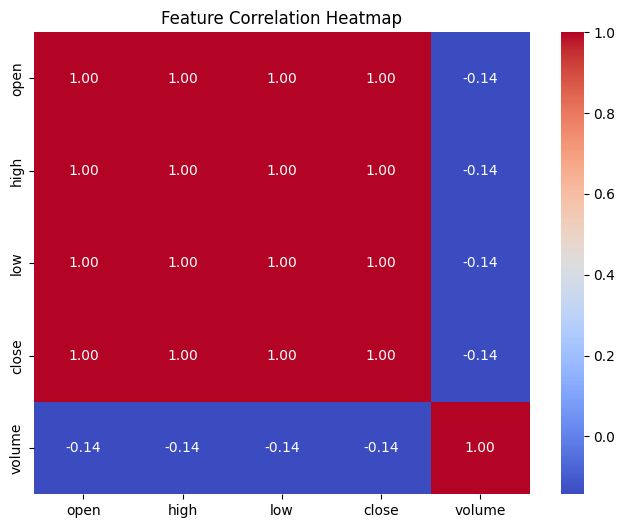

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.3225900805372306
R2 Score: 0.9996487845726062


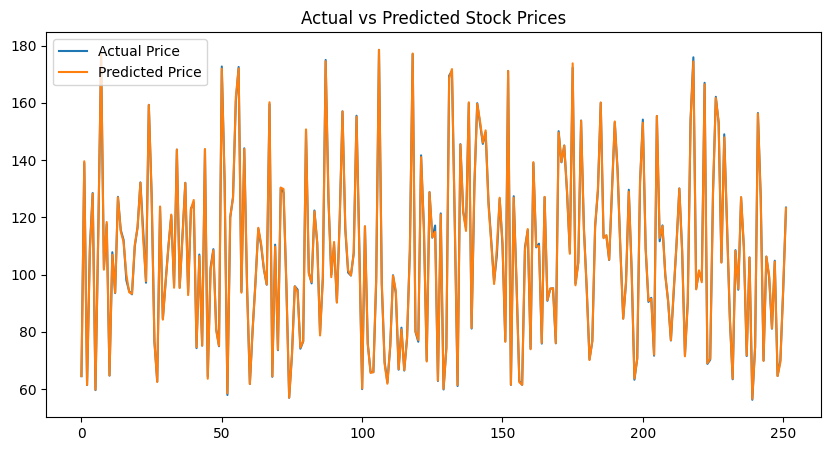

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

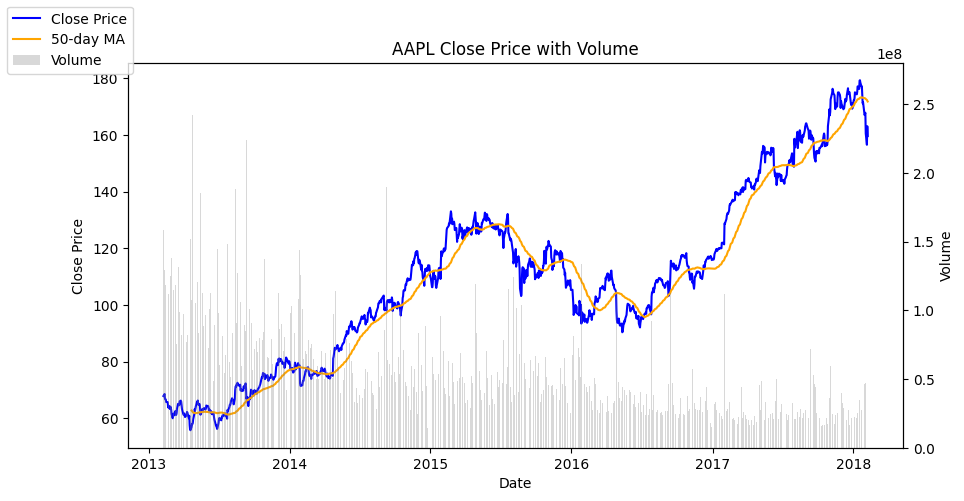

In [ ]:
# Combines price trends with trading volume.
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(apple_data['date'], apple_data['close'], label='Close Price', color='blue')
ax1.plot(apple_data['date'], apple_data['close'].rolling(window=50).mean(), label='50-day MA', color='orange')
ax2.bar(apple_data['date'], apple_data['volume'], label='Volume', alpha=0.3, color='grey')

ax1.set_title('AAPL Close Price with Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('Volume')
fig.legend(loc='upper left')
plt.show()


In [ ]:
# Considering Whole Dataset

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['Name', 'date'])

# Create additional features
df['Daily Return'] = df.groupby('Name')['close'].pct_change()
df['Average Volume'] = df.groupby('Name')['volume'].transform('mean')

# Feature Engineering: Add new features
df['price_range'] = df['high'] - df['low']
df['average_price'] = (df['open'] + df['close']) / 2


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Select features and target
features = ['open', 'high', 'low', 'volume', 'Daily Return', 'Average Volume', 'price_range', 'average_price']
X = df[features]
y = df['close']

# Encode company symbols if needed
X['Name'] = pd.factorize(df['Name'])[0]


<ipython-input-10-299e49636e32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Name'] = pd.factorize(df['Name'])[0]


In [ ]:
from sklearn.impute import SimpleImputer

# Handle missing values: Fill NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
# Check for any remaining missing values
print("Remaining NaN values:", X.isnull().sum().sum())

Remaining NaN values: 0


In [ ]:
# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

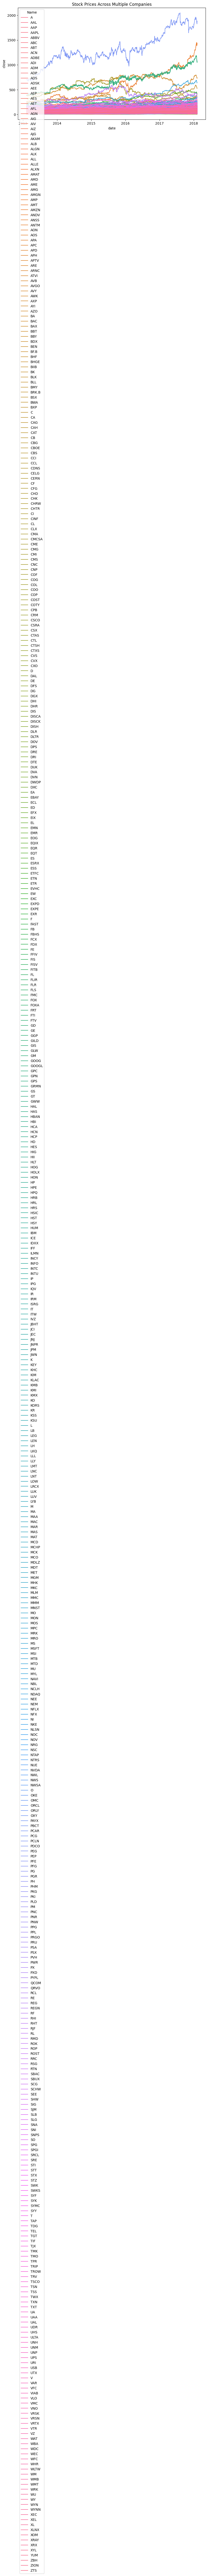

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='close', hue='Name')
plt.title('Stock Prices Across Multiple Companies')
plt.show()

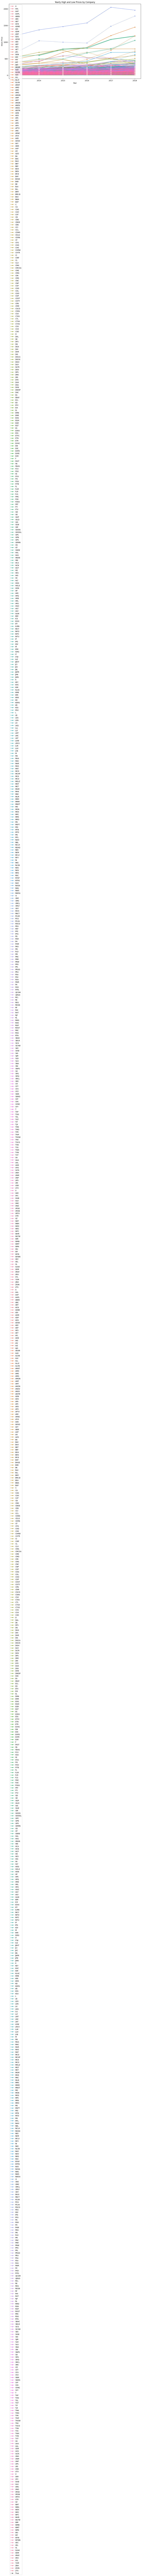

In [ ]:
# Yearly High and Low Analysis per Company
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime and extract year
df['Year'] = df['date'].dt.year

# Calculate yearly high and low for each company
yearly_stats = df.groupby(['Name', 'Year'])['close'].agg(['max', 'min']).reset_index()

# Plot high and low prices per year
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_stats, x='Year', y='max', hue='Name', marker='o')
sns.lineplot(data=yearly_stats, x='Year', y='min', hue='Name', style=True, dashes=[(2, 2)], marker='o')

plt.title('Yearly High and Low Prices by Company')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()


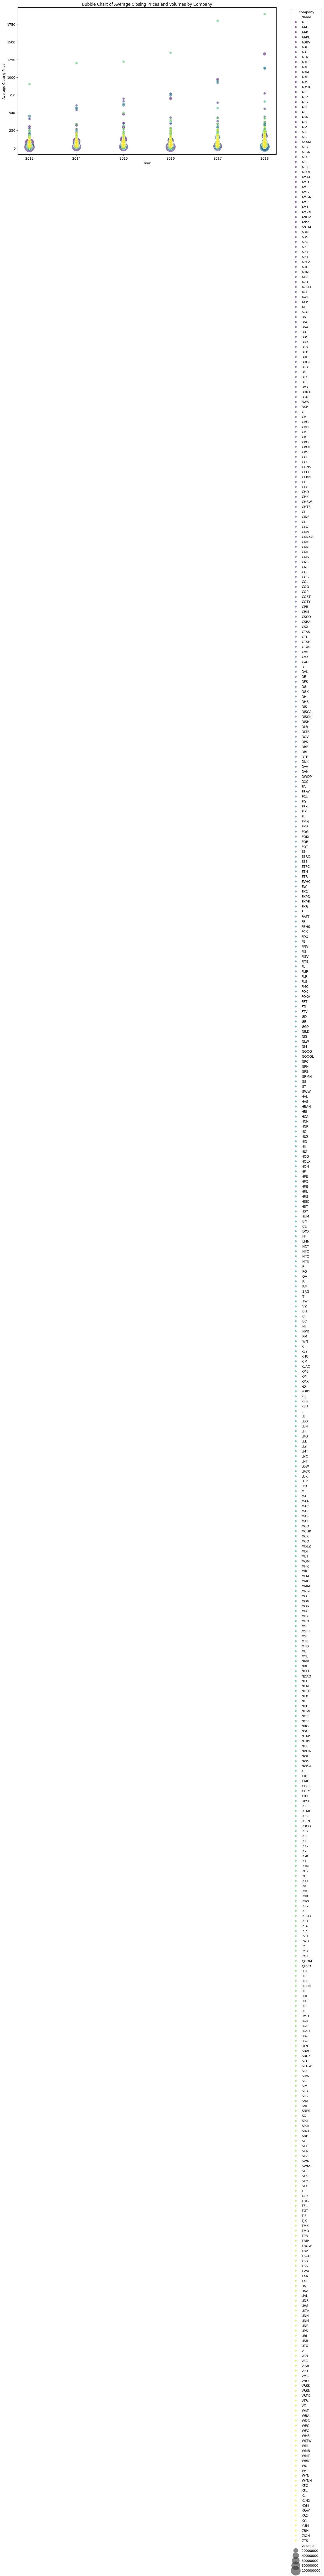

In [ ]:
# Visualize stocks' closing prices and volume

# Ensure 'Date' is datetime and extract the year
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year

# Calculate average closing price and average volume per year for each company
yearly_avg = df.groupby(['Name', 'Year']).agg({'close': 'mean', 'volume': 'mean'}).reset_index()

# Bubble Chart
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=yearly_avg,
    x='Year',
    y='close',
    size='volume',
    hue='Name',
    alpha=0.6,
    palette='viridis',  # Color scheme
    sizes=(50, 1000)  # Size range for bubbles
)

plt.title('Bubble Chart of Average Closing Prices and Volumes by Company')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Map company names into categories
sector_mapping = {
    'Technology': ['AAPL', 'MSFT', 'GOOG', 'FB', 'INTC', 'NVDA', 'CSCO', 'ADBE', 'ORCL', 'IBM'],
    'Healthcare': ['JNJ', 'PFE', 'MRK', 'ABT', 'ABBV', 'BMY', 'LLY', 'AMGN', 'MDT', 'CVS'],
    'Finance': ['JPM', 'BAC', 'GS', 'WFC', 'MS', 'C', 'AXP', 'BLK', 'BK', 'STT'],
    'Consumer': ['KO', 'PEP', 'PG', 'WMT', 'MCD', 'DIS', 'NKE', 'SBUX', 'TGT', 'YUM'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'HAL', 'KMI', 'PSX', 'EOG', 'MPC', 'PXD'],
    'Industrials': ['BA', 'HON', 'CAT', 'GE', 'UPS', 'MMM', 'RTX', 'LMT', 'DE', 'ITW'],
    'Others': ['ZTS', 'TSN', 'DHR', 'V', 'MA', 'PYPL', 'T', 'VZ', 'CMCSA', 'AMZN']
}

In [ ]:
# Function to map company names to sectors
def map_sector(name):
    for sector, companies in sector_mapping.items():
        if name in companies:
            return sector
    return 'Uncategorized'

In [ ]:
# Apply mapping to dataset
df['Sector'] = df['Name'].apply(map_sector)

In [ ]:
# Validate the mapping
print(df['Sector'].value_counts())

Sector
Uncategorized    533077
Finance           12590
Energy            12590
Consumer          12590
Healthcare        12588
Technology        12304
Others            11970
Industrials       11331
Name: count, dtype: int64


<ipython-input-30-c236870bedd2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index, palette='viridis')


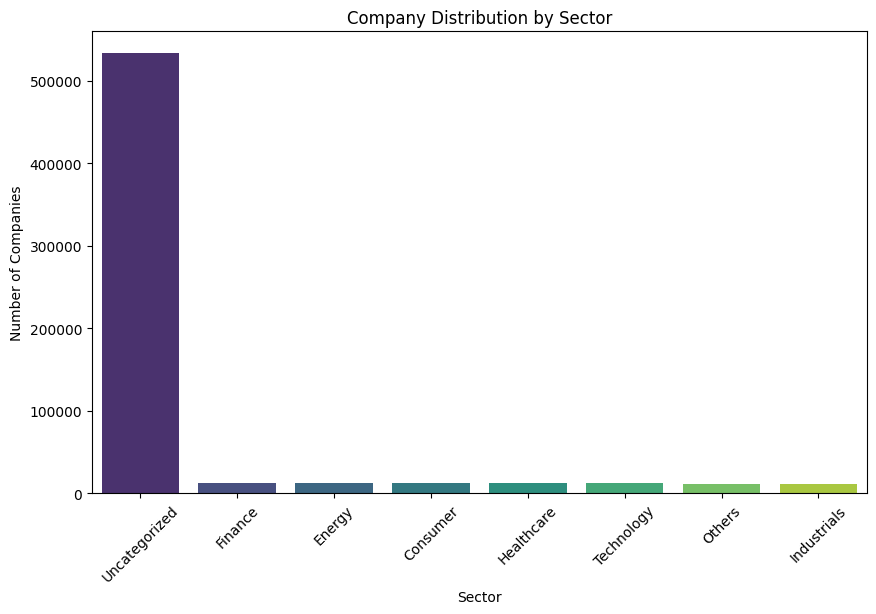

In [ ]:
# Bar plot for company distribution across sectors
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index, palette='viridis')
plt.title("Company Distribution by Sector")
plt.ylabel("Number of Companies")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Filter out uncategorized data
categorized_data = df[df['Sector'] != 'Uncategorized']

In [ ]:
categorized_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85963 entries, 1259 to 619039
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            85963 non-null  datetime64[ns]
 1   open            85963 non-null  float64       
 2   high            85963 non-null  float64       
 3   low             85963 non-null  float64       
 4   close           85963 non-null  float64       
 5   volume          85963 non-null  int64         
 6   Name            85963 non-null  object        
 7   Daily Return    85894 non-null  float64       
 8   Average Volume  85963 non-null  float64       
 9   price_range     85963 non-null  float64       
 10  average_price   85963 non-null  float64       
 11  Sector          85963 non-null  object        
 12  daily_return    85963 non-null  float64       
 13  year            85963 non-null  int32         
 14  month           85963 non-null  int32         
dtypes: 

In [ ]:
# Feaure Engineering
# Calculate daily price range
df['price_range'] = df['high'] - df['low']

In [ ]:
# Calculate average price
df['average_price'] = (df['open'] + df['close']) / 2

In [ ]:
# Calculate daily returns
df['daily_return'] = df['close'].pct_change()

In [ ]:
# Add year and month for time-based analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

<ipython-input-36-489aee1d86c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=categorized_data, x='Sector', y='daily_return', palette='coolwarm')


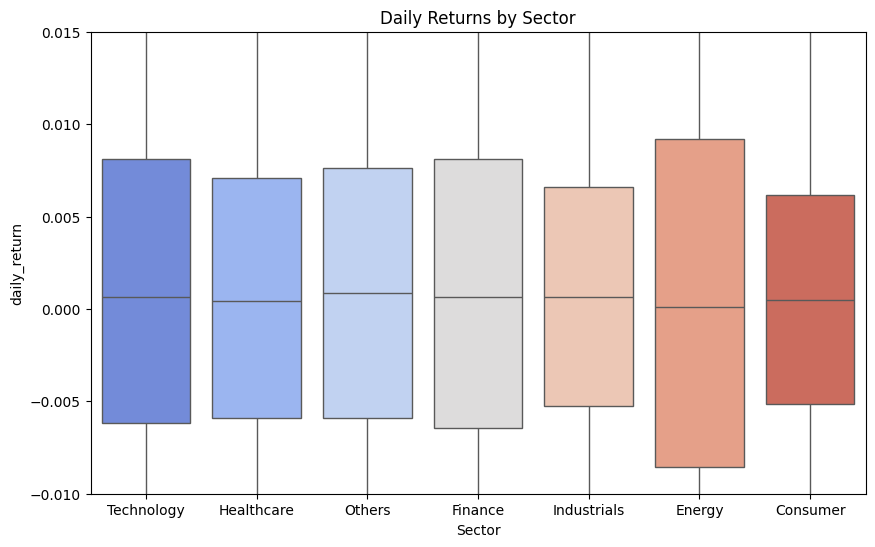

In [ ]:
# Data Visualization
# Average daily return by sector
plt.figure(figsize=(10, 6))
sns.boxplot(data=categorized_data, x='Sector', y='daily_return', palette='coolwarm')
plt.title("Daily Returns by Sector")
plt.ylim(-0.01, 0.015)
plt.show()

<ipython-input-37-0310dc26ae1b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_volume.index, y=sector_volume.values, palette='plasma')


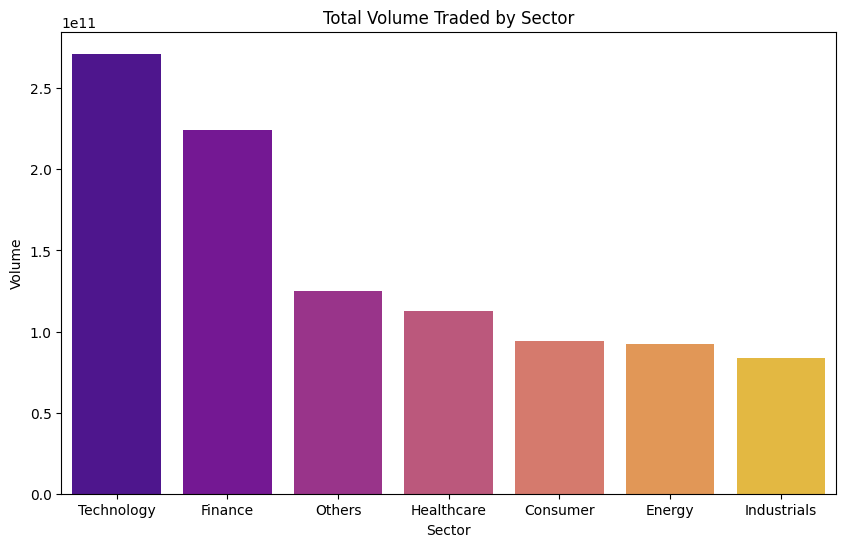

In [ ]:
# Volume traded per sector
plt.figure(figsize=(10, 6))
sector_volume = categorized_data.groupby('Sector')['volume'].sum().sort_values(ascending=False)
sns.barplot(x=sector_volume.index, y=sector_volume.values, palette='plasma')
plt.title("Total Volume Traded by Sector")
plt.ylabel("Volume")
plt.xlabel("Sector")
plt.show()

<ipython-input-64-4ae3f20401a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=categorized_data, x='Sector', y='price_range', palette='Set2')


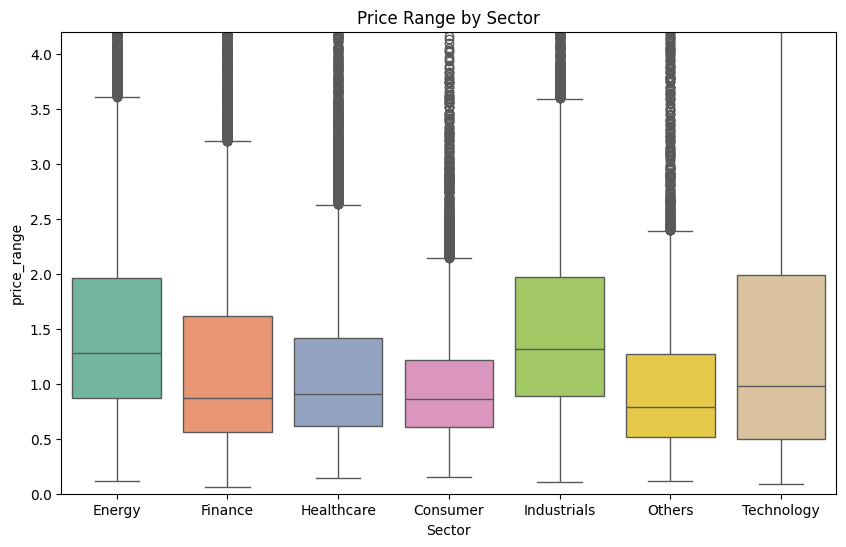

In [ ]:
# Price range analysis per sector
plt.figure(figsize=(10, 6))
sns.boxplot(data=categorized_data, x='Sector', y='price_range', palette='Set2')
plt.title("Price Range by Sector")
plt.ylim(0, df['price_range'].quantile(0.95))
plt.show()

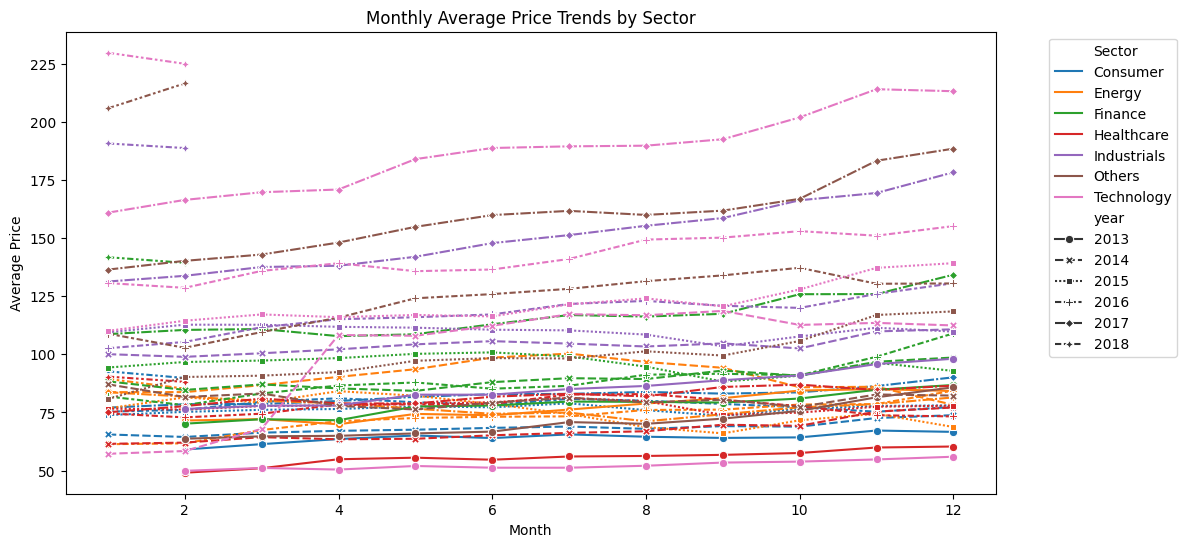

In [ ]:
# Monthly average price trends
monthly_avg = categorized_data.groupby(['year', 'month', 'Sector'])['average_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='average_price', hue='Sector', style='year', markers=True)
plt.title("Monthly Average Price Trends by Sector")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


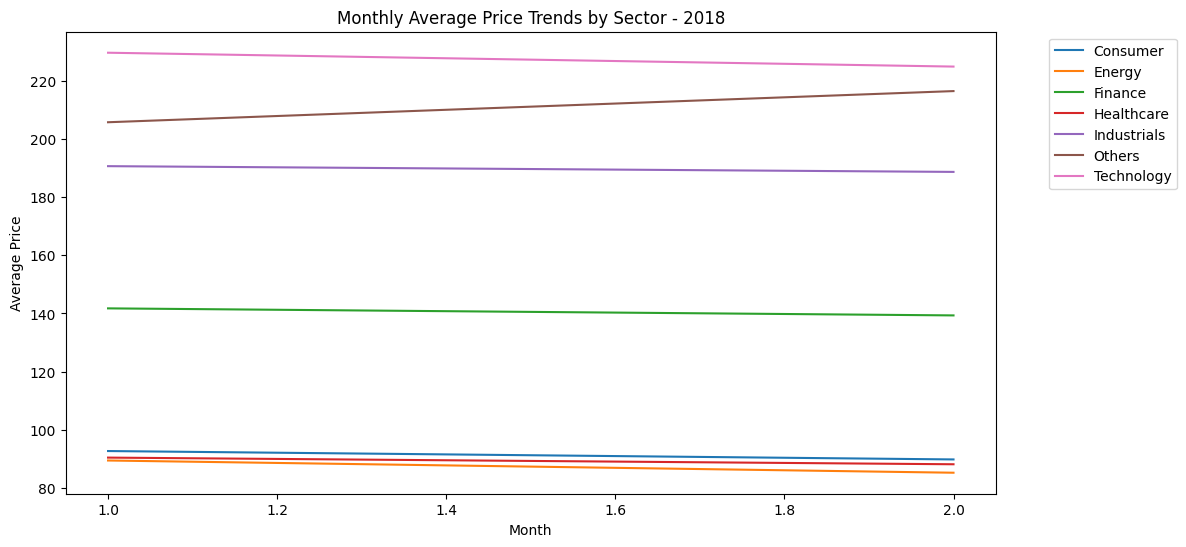

In [ ]:
last_year = categorized_data['year'].max()

# Filter for the last year
last_year_data = categorized_data[categorized_data['year'] == last_year]

# Calculate monthly average price trends for the last year
monthly_avg_last_year = last_year_data.groupby(['year', 'month', 'Sector'])['average_price'].mean().reset_index()

# Plotting monthly average price trends for the last year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_last_year, x='month', y='average_price', hue='Sector', markers=True)
plt.title(f"Monthly Average Price Trends by Sector - {last_year}")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-44-4e373c62dd6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_avg_price.index, y=sector_avg_price.values, palette='viridis')


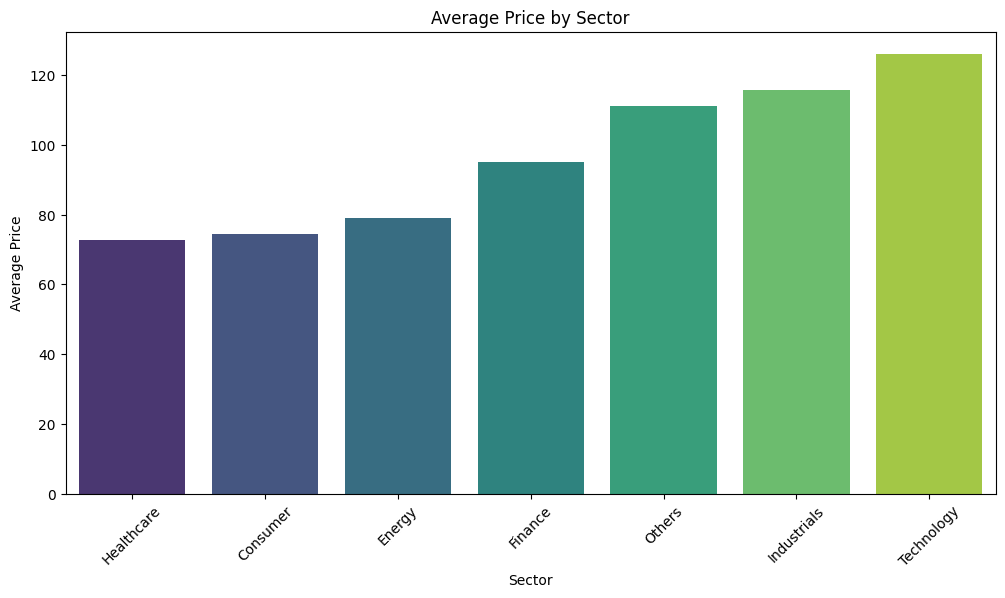

In [ ]:
# Compare the average stock price across sectors.
sector_avg_price = categorized_data.groupby('Sector')['close'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_avg_price.index, y=sector_avg_price.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Price by Sector")
plt.xlabel("Sector")
plt.ylabel("Average Price")
plt.show()

In [ ]:
# Print sector-level summary
summary = categorized_data.groupby('Sector').agg({
    'daily_return': ['mean', 'std'],
    'volume': 'sum',
    'price_range': 'mean'
})
print(summary)


            daily_return                  volume price_range
                    mean       std           sum        mean
Sector                                                      
Consumer        0.000775  0.045591   94065752181    1.002866
Energy          0.000063  0.023651   92396999483    1.696958
Finance         0.000854  0.038637  223989322224    1.583160
Healthcare      0.000187  0.019882  112570856106    1.205389
Industrials     0.000604  0.020765   83400026367    1.595064
Others          0.000629  0.023936  124699843918    1.927624
Technology      0.001556  0.111989  271255140330    2.075263


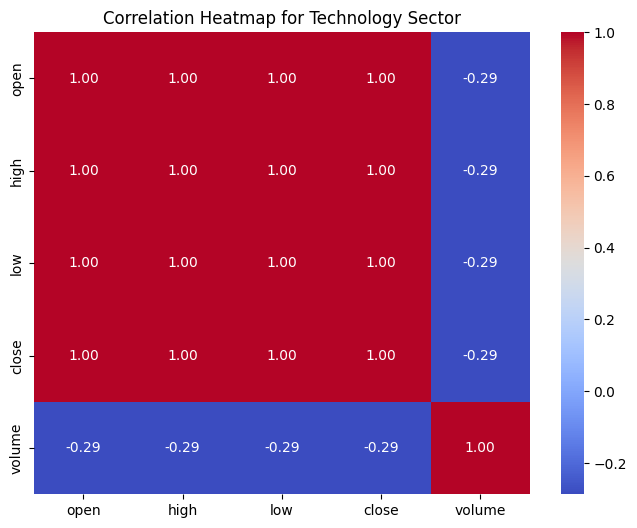

In [ ]:
# Correlation heatmap for a single sector (e.g., Technology)
tech_data = categorized_data[categorized_data['Sector'] == 'Technology']
correlation = tech_data[['open', 'high', 'low', 'close', 'volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Technology Sector")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

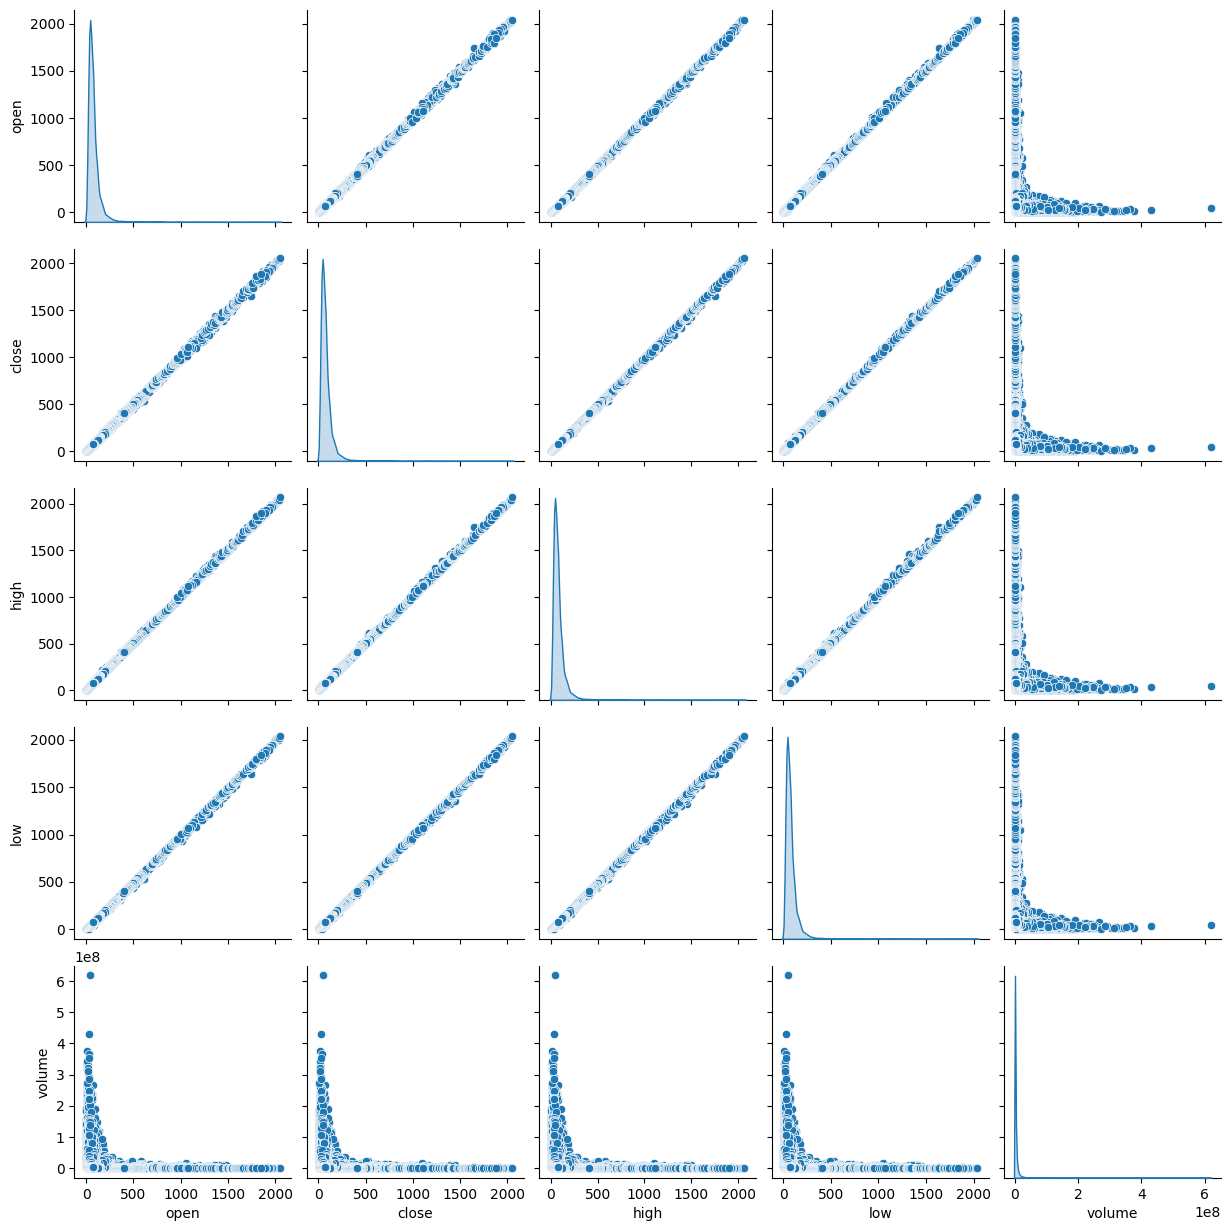

In [ ]:
# Analyze pairwise relationships between features
sns.pairplot(df[['open', 'close', 'high', 'low', 'volume']], diag_kind='kde', palette='coolwarm')
plt.show()


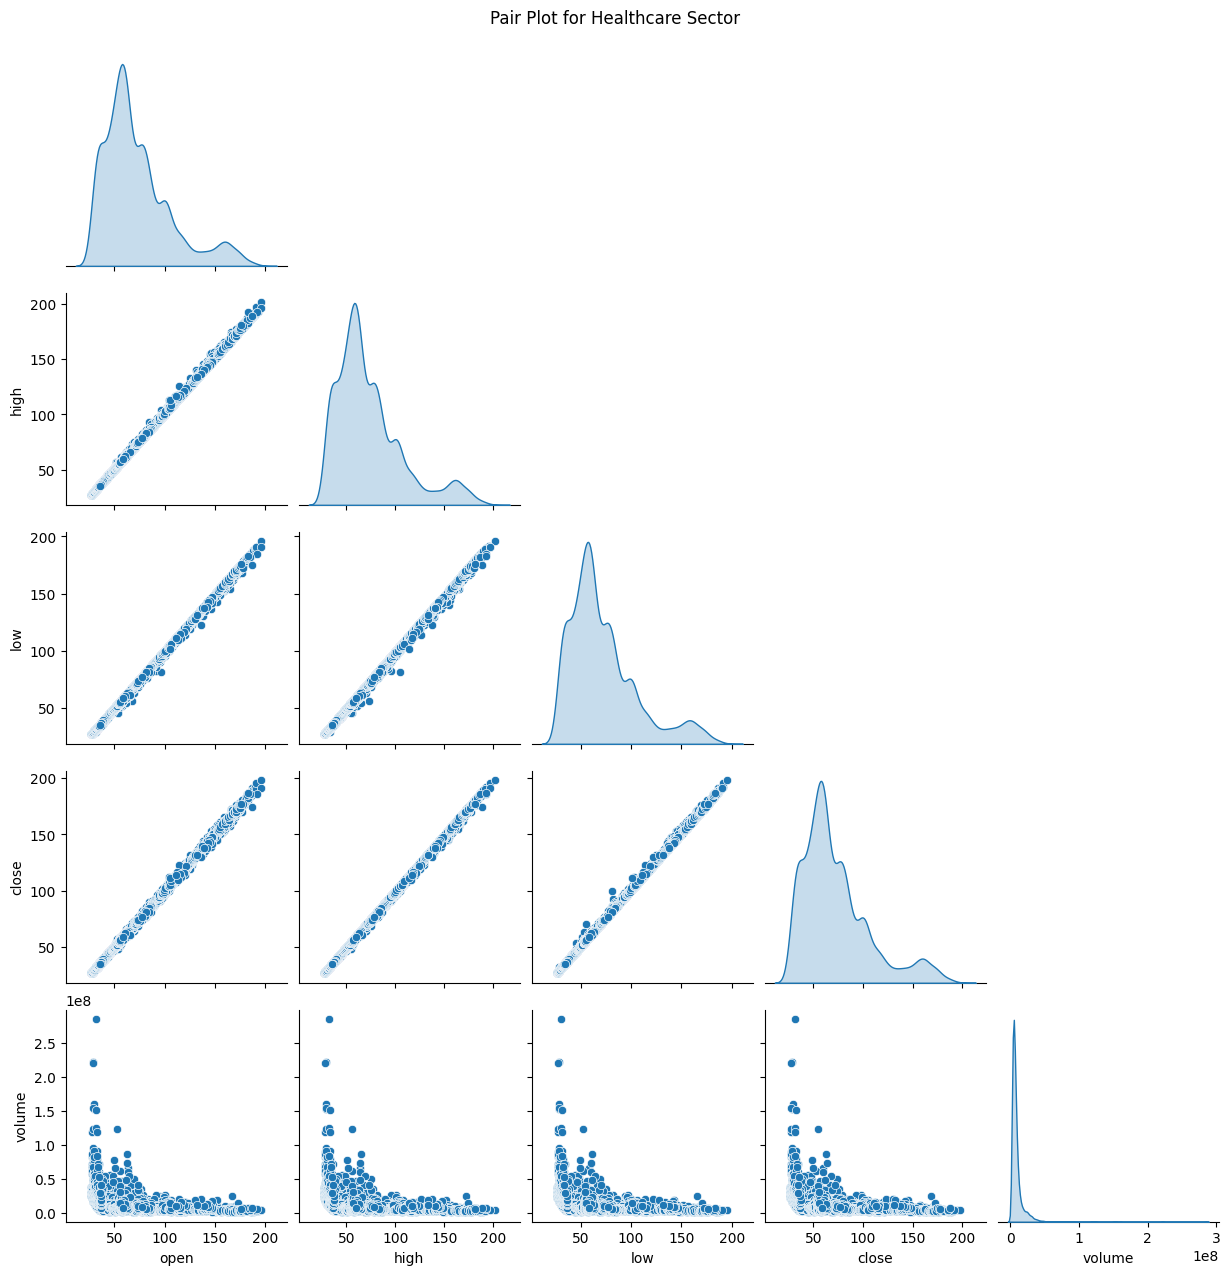

In [ ]:
# Pair plot for numerical features in Healthcare sector
healthcare_data = categorized_data[categorized_data['Sector'] == 'Healthcare']
sns.pairplot(healthcare_data[['open', 'high', 'low', 'close', 'volume']], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot for Healthcare Sector", y=1.02)
plt.show()


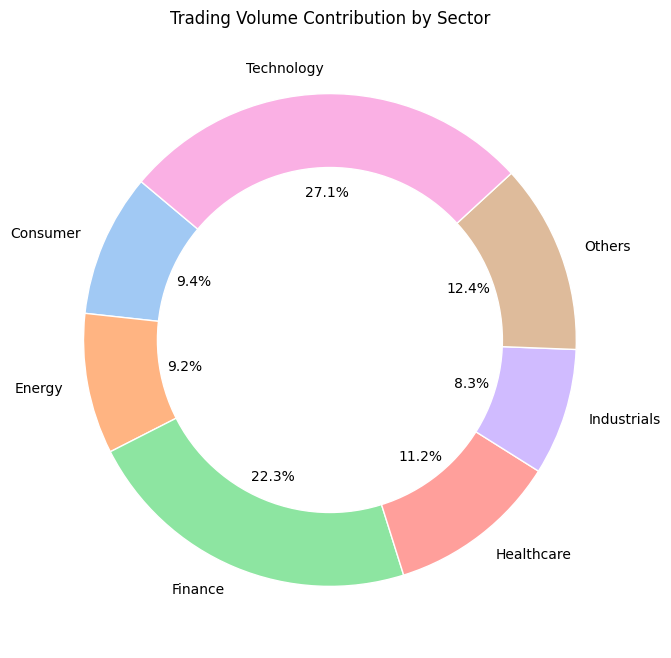

In [ ]:
# Donut chart for sector volume
sector_volume = categorized_data.groupby('Sector')['volume'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sector_volume, labels=sector_volume.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  # Add a hole
plt.title("Trading Volume Contribution by Sector")
plt.show()


In [ ]:
import plotly.express as px

# Example data for a sunburst chart (sector -> company)
sunburst_data = categorized_data.groupby(['Sector', 'Name']).size().reset_index(name='Count')

fig = px.sunburst(sunburst_data, path=['Sector', 'Name'], values='Count', color='Sector',
                  title="Company Distribution Across Sectors")
fig.show()


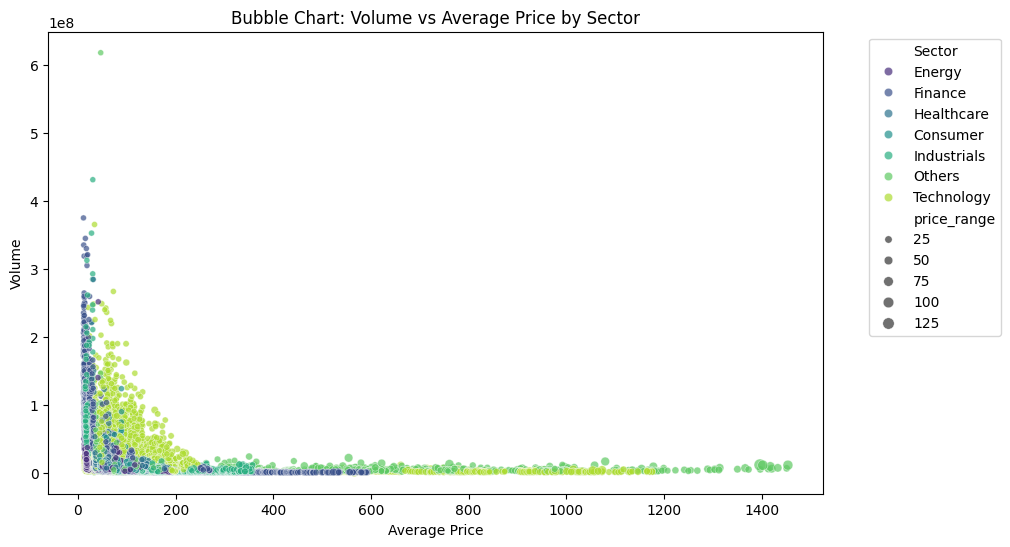

In [ ]:
# Bubble chart for volume vs average price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=categorized_data, x='average_price', y='volume', size='price_range', hue='Sector', alpha=0.7, palette='viridis')
plt.title("Bubble Chart: Volume vs Average Price by Sector")
plt.xlabel("Average Price")
plt.ylabel("Volume")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


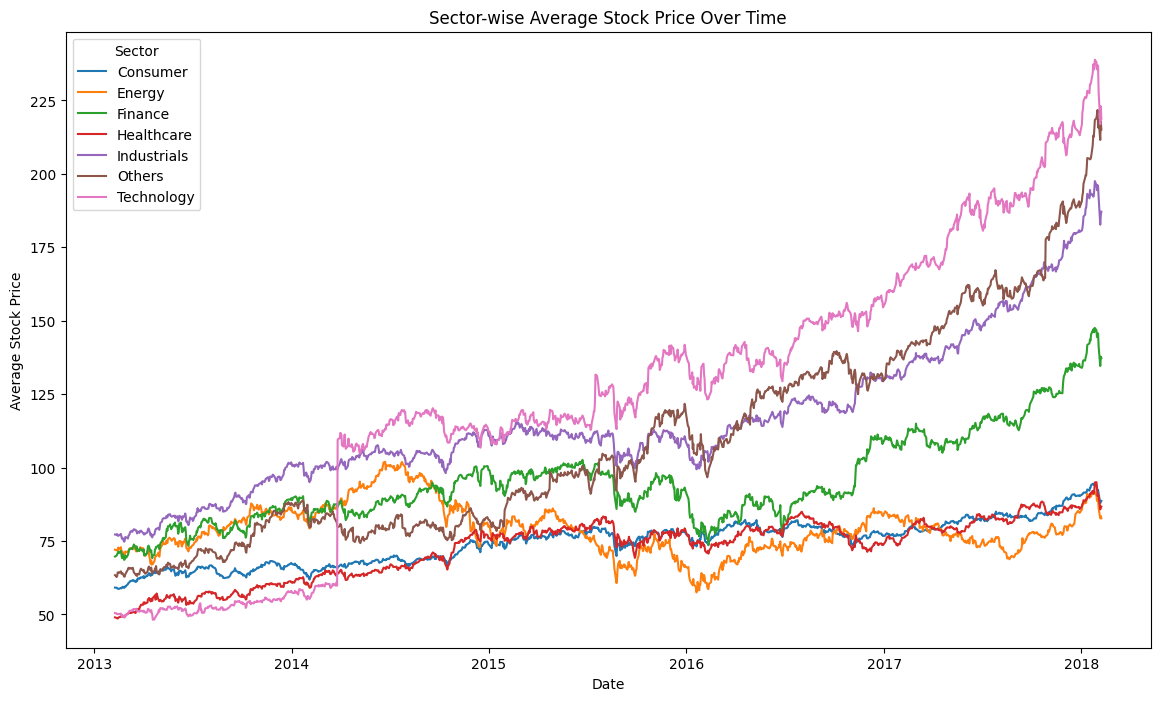

In [ ]:
# Calculate average price per sector over time
sector_avg = categorized_data.groupby(['date', 'Sector'])['close'].mean().reset_index()

# Plot sector performance
plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_avg, x='date', y='close', hue='Sector')
plt.title('Sector-wise Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.legend(title='Sector')
plt.show()


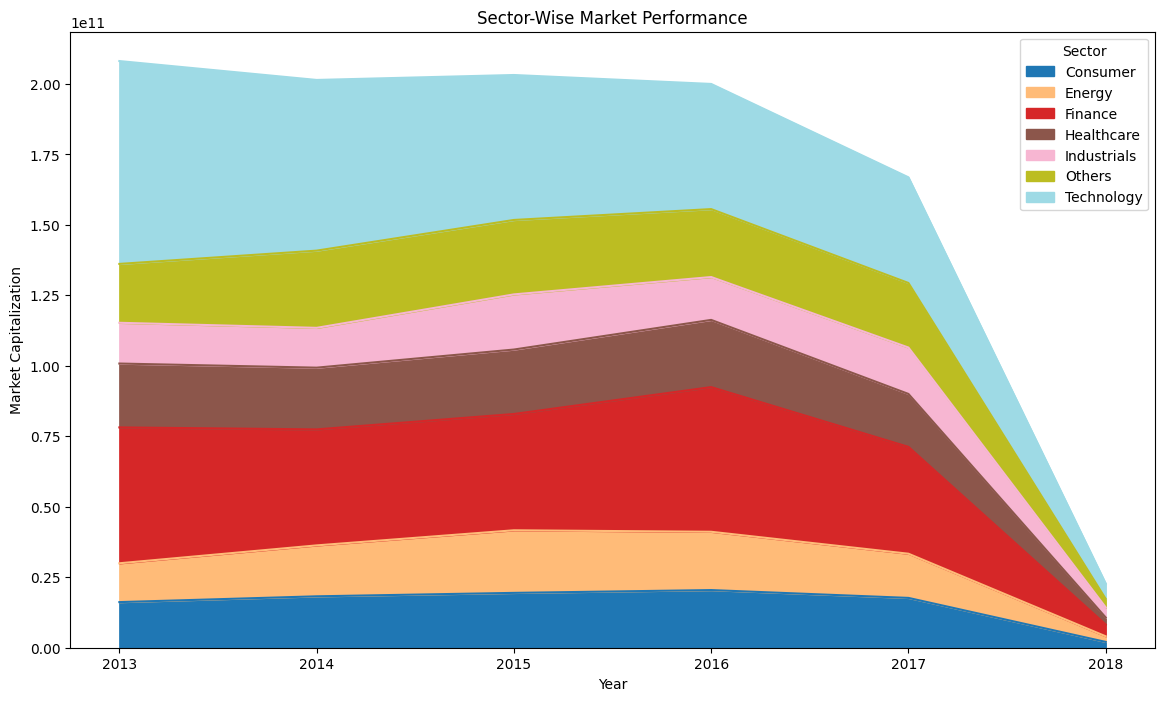

In [ ]:
sector_performance = categorized_data.groupby(['Year', 'Sector'])['volume'].sum().reset_index()

# Pivot for stacked area plot
sector_pivot = sector_performance.pivot_table(values='volume', index='Year', columns='Sector')

# Stacked area chart for sector performance
sector_pivot.plot(kind='area', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Sector-Wise Market Performance')
plt.xlabel('Year')
plt.ylabel('Market Capitalization')
plt.show()

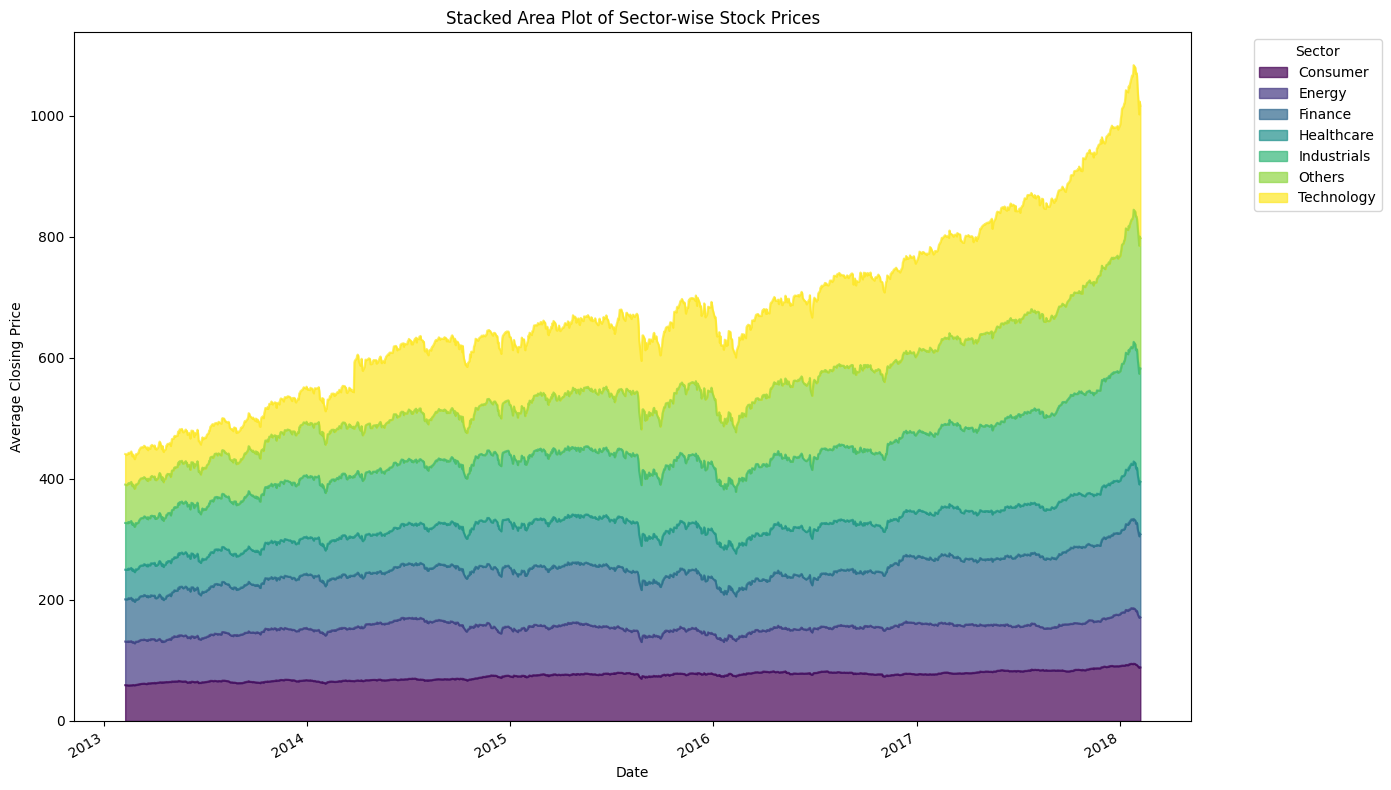

In [ ]:
# Calculate market value per company
df['Market Value'] = df['close'] * df['volume']

# Group by Date and Sector, then sum the 'Close' values
sector_data = categorized_data.groupby(['date', 'Sector'])['close'].mean().reset_index()

# Pivot to make sectors columns
pivot_sector = sector_data.pivot(index='date', columns='Sector', values='close')

# Plot the stacked area chart by sector
pivot_sector.plot(
    kind='area',
    stacked=True,
    figsize=(14, 8),
    colormap='viridis',  # Adjust color palette
    alpha=0.7
)
plt.title('Stacked Area Plot of Sector-wise Stock Prices')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # Adjust layout
plt.show()

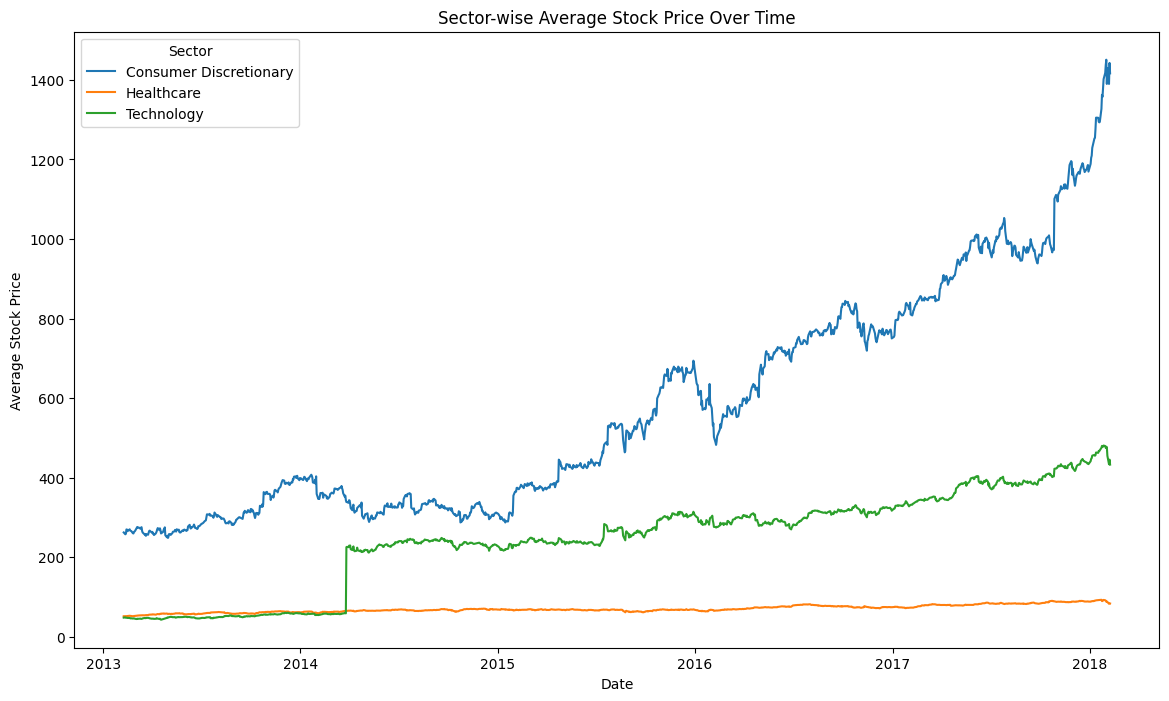

In [ ]:
# Sector Performance Comparison
# Example sector column addition if not present
sector_mapping = {
    'AAPL': 'Technology',
    'GOOG': 'Technology',
    'AMZN': 'Consumer Discretionary',
    'MSFT': 'Technology',
    'TSLA': 'Consumer Discretionary',
    'JNJ': 'Healthcare',
    'PFE': 'Healthcare',
}

df['Sector'] = df['Name'].map(sector_mapping)


# Calculate average price per sector over time
sector_avg = df.groupby(['date', 'Sector'])['close'].mean().reset_index()

# Plot sector performance
plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_avg, x='date', y='close', hue='Sector')
plt.title('Sector-wise Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.legend(title='Sector')
plt.show()


     Name  MarketValueIndicator
38   AMZN          1.014803e+10
3    AAPL          8.233633e+09
180    FB          4.973308e+09
346  NVDA          4.592775e+09
322  MSFT          3.683651e+09


<ipython-input-48-be04b1597702>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_value_per_company.sort_values(by='MarketValueIndicator', ascending=False, inplace=True)


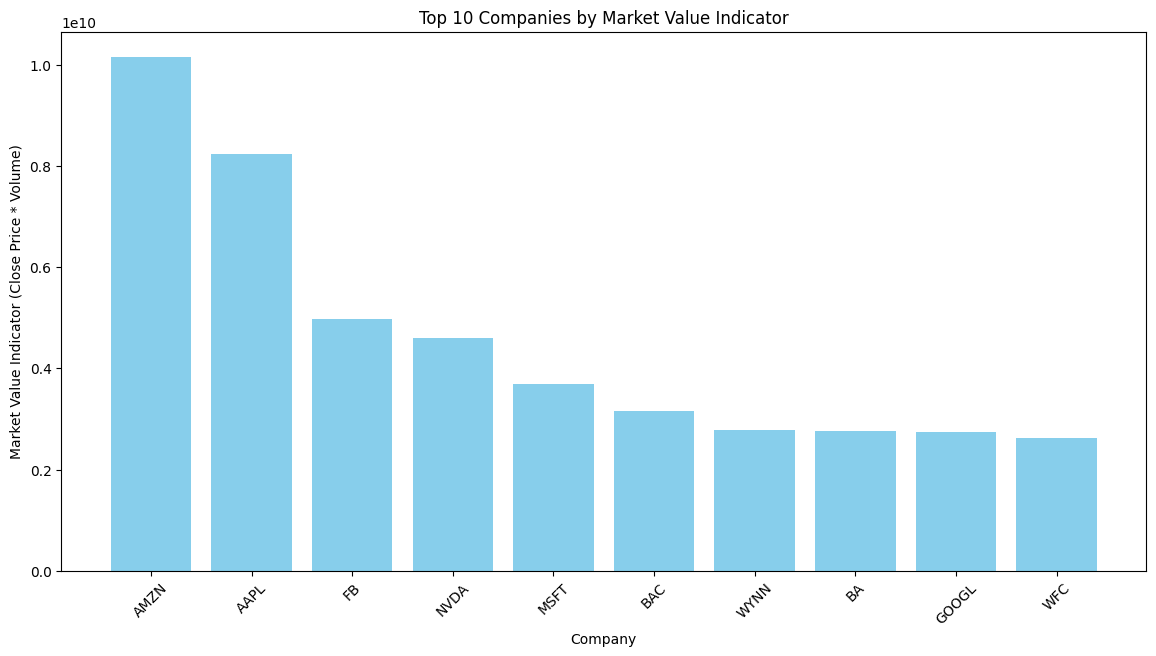

In [ ]:
# approximate market value per company using the closing price and volume as proxies
# Load the dataset (ensure 'df' is your DataFrame)
df['date'] = pd.to_datetime(df['date'])

# Calculate an approximate 'market value indicator' (close price * volume)
df['MarketValueIndicator'] = df['close'] * df['volume']

# Summarize per company (latest available date per company)
latest_data = df.sort_values(by='date').groupby('Name').last().reset_index()

# Extract relevant columns
market_value_per_company = latest_data[['Name', 'MarketValueIndicator']]

# Sort for visualization
market_value_per_company.sort_values(by='MarketValueIndicator', ascending=False, inplace=True)

# Display result
print(market_value_per_company.head())

plt.figure(figsize=(14, 7))
plt.bar(market_value_per_company['Name'][:10], market_value_per_company['MarketValueIndicator'][:10], color='skyblue')
plt.title('Top 10 Companies by Market Value Indicator')
plt.xlabel('Company')
plt.ylabel('Market Value Indicator (Close Price * Volume)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Fit different models

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R2 Score: {r2_lr:.4f}")

Linear Regression R2 Score: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree R2 Score: {r2_dt:.4f}")

Decision Tree R2 Score: 1.0000


In [ ]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R2 Score: {r2_rf:.4f}")

Random Forest R2 Score: 1.0000


In [ ]:
# Random Forest is taking 11m and Decision tree is execute in 10s

In [ ]:
# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# GridSearchCV to find best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best SVM Parameters:", grid_search.best_params_)

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

Best SVM Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
R² Score: 0.9997
